# Chapter 13 - The Decision Tree

## Listing 13-1. Import the bike data

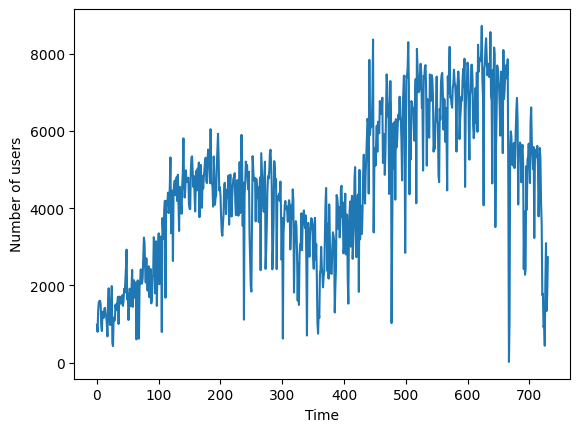

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('bikedata/day.csv')
ax = data['cnt'].plot()
ax.set_ylabel('Number of users')
ax.set_xlabel('Time')
plt.show()


## Listing 13-2. Creating the training dataset

In [3]:
# 7 last days of user count (autoregression)
data['usersL1'] = data['cnt'].shift(1)
data['usersL2'] = data['cnt'].shift(2)
data['usersL3'] = data['cnt'].shift(3)
data['usersL4'] = data['cnt'].shift(4)
data['usersL5'] = data['cnt'].shift(5)
data['usersL6'] = data['cnt'].shift(6)
data['usersL7'] = data['cnt'].shift(7)

# 7 last days of weathersit
data['weatherL1'] = data['weathersit'].shift(1)
data['weatherL2'] = data['weathersit'].shift(2)
data['weatherL3'] = data['weathersit'].shift(3)
data['weatherL4'] = data['weathersit'].shift(4)
data['weatherL5'] = data['weathersit'].shift(5)
data['weatherL6'] = data['weathersit'].shift(6)
data['weatherL7'] = data['weathersit'].shift(7)

# 7 last days of temperature
data['tempL1'] = data['temp'].shift(1)
data['tempL2'] = data['temp'].shift(2)
data['tempL3'] = data['temp'].shift(3)
data['tempL4'] = data['temp'].shift(4)
data['tempL5'] = data['temp'].shift(5)
data['tempL6'] = data['temp'].shift(6)
data['tempL7'] = data['temp'].shift(7)

# 7 last days of humidity
data['humL1'] = data['hum'].shift(1)
data['humL2'] = data['hum'].shift(2)
data['humL3'] = data['hum'].shift(3)
data['humL4'] = data['hum'].shift(4)
data['humL5'] = data['hum'].shift(5)
data['humL6'] = data['hum'].shift(6)
data['humL7'] = data['hum'].shift(7)

data = data.dropna()
data = data.drop(477)

X = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
          'weatherL1', 'weatherL2', 'weatherL3', 'weatherL4', 'weatherL5', 'weatherL6', 'weatherL7',
         'usersL1','usersL2', 'usersL3', 'usersL4', 'usersL5', 'usersL6', 'usersL7',
         'tempL1', 'tempL2', 'tempL3', 'tempL4', 'tempL5', 'tempL6', 'tempL7',
         'humL1', 'humL2','humL3', 'humL4', 'humL5', 'humL6', 'humL7']]

y = data['cnt']


## Listing 13-3. Fitting the model

In [4]:
import mlflow
mlflow.autolog()

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345, shuffle=False)

from sklearn.tree import DecisionTreeRegressor
my_dt = DecisionTreeRegressor(random_state=12345)
my_dt.fit(X_train, y_train)

from sklearn.metrics import r2_score
print(r2_score(list(y_test), list(my_dt.predict(X_test))))


2025/05/27 12:56:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/27 12:56:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '484941acd61d427c8273f18f2322e6ec', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/27 12:56:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as d

0.16582718614044134


## Listing 13-4. Adding a grid search

In [7]:
from sklearn.model_selection import GridSearchCV

my_dt = GridSearchCV(DecisionTreeRegressor(random_state=44), 
                 {'min_samples_split': list(range(20,50, 2)),
                 'max_features': [0.6, 0.7, 0.8, 0.9, 1.],
                 'criterion': ['squared_error', 'absolute_error']},
                scoring = 'r2', n_jobs = -1)

my_dt.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_dt.predict(X_test))))


2025/05/27 13:00:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5b818e85e26e470e8af2e38df4a3b7c2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/27 13:00:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Mi

0.5545378076277191


## Listing 13-5. Finding the best parameters

In [8]:
print(my_dt.best_estimator_)

DecisionTreeRegressor(criterion='absolute_error', max_features=0.8,
                      min_samples_split=48, random_state=44)


In [ ]:
!mlflow ui

[2025-05-27 13:02:56 +0200] [30530] [INFO] Starting gunicorn 23.0.0
[2025-05-27 13:02:56 +0200] [30530] [INFO] Listening at: http://127.0.0.1:5000 (30530)
[2025-05-27 13:02:56 +0200] [30530] [INFO] Using worker: sync
[2025-05-27 13:02:56 +0200] [30531] [INFO] Booting worker with pid: 30531
[2025-05-27 13:02:56 +0200] [30532] [INFO] Booting worker with pid: 30532
[2025-05-27 13:02:56 +0200] [30533] [INFO] Booting worker with pid: 30533
[2025-05-27 13:02:56 +0200] [30534] [INFO] Booting worker with pid: 30534


## Listing 13-6. Plotting the prediction

2025/05/27 13:06:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/chapter12-15/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


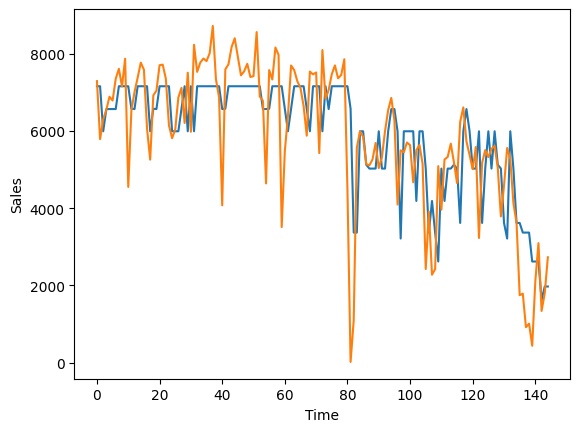

In [11]:
fcst = my_dt.predict(X_test)

plt.plot(list(fcst))
plt.plot(list(y_test))
plt.ylabel('Sales')
plt.xlabel('Time')
plt.show()


## Listing 13-7. Plotting the prediction

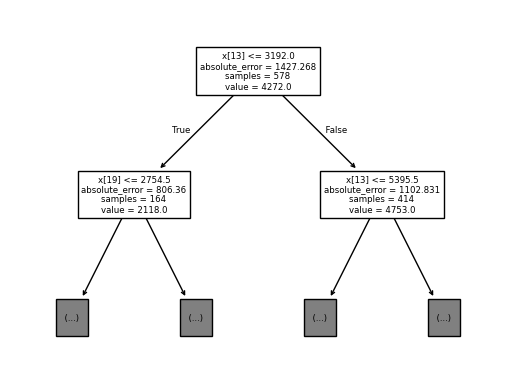

In [12]:
from sklearn.tree import plot_tree
plot_tree(my_dt.best_estimator_, max_depth=1)
plt.show()
